In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
classes = data["class"].value_counts()
classes

e    4208
p    3916
Name: class, dtype: int64

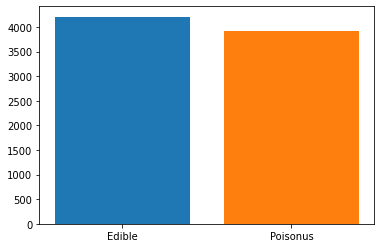

In [10]:
plt.bar("Edible", classes["e"])
plt.bar("Poisonus", classes["p"])
plt.show()

In [18]:
X = data.loc[:,["cap-shape","cap-color","ring-number","ring-type"]]
y = data.loc[:,"class"]

In [20]:
encoder = LabelEncoder()

for i in X.columns:
    X[i] = encoder.fit_transform(X[i])

y = encoder.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [24]:
logistic_classifier_model = LogisticRegression()
ridge_classifier_model = RidgeClassifier()
decision_tree_model = DecisionTreeClassifier()
naive_bayes_model = GaussianNB()
neural_network_model = MLPClassifier()


In [25]:
logistic_classifier_model.fit(X_train, y_train)
ridge_classifier_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)
neural_network_model.fit(X_train, y_train)

c:\Users\aalpe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [26]:
logistic_pred = logistic_classifier_model.predict(X_test)
ridge_pred = ridge_classifier_model.predict(X_test)
tree_pred = decision_tree_model.predict(X_test)
naive_pred = naive_bayes_model.predict(X_test)
neural_pred = neural_network_model.predict(X_test)

In [27]:
logistic_report = classification_report(y_test,logistic_pred)
ridge_report = classification_report(y_test,ridge_pred)
tree_report = classification_report(y_test,tree_pred)
naive_report = classification_report(y_test,naive_pred)
neural_report = classification_report(y_test,neural_pred)

In [33]:
print("***** Logistic Regression *****")
print(logistic_report)
print("***** Ridge Regression *****")
print(ridge_report)
print("***** Decision Tree *****")
print(tree_report)

***** Logistic Regression *****
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1265
           1       0.78      0.79      0.78      1173

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

***** Ridge Regression *****
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1265
           1       0.78      0.79      0.78      1173

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

***** Decision Tree *****
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1265
           1       0.88      0.91      0.89      1173

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.

In [32]:
print("***** Naive Bayes *****")
print(naive_report)
print("***** Neural Network *****")
print(neural_report)

***** Naive Bayes *****
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1265
           1       0.78      0.79      0.79      1173

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

***** Neural Network *****
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1265
           1       0.84      0.85      0.85      1173

    accuracy                           0.85      2438
   macro avg       0.85      0.85      0.85      2438
weighted avg       0.85      0.85      0.85      2438

